# Basic sequencing QC statistics for oligoCLIP libraries

In [1]:
ABC_dir1='/home/hsher/scratch/ABC_reprocess/QC'
ABC_dir2='/home/hsher/scratch/ABC_reprocess2/QC'

In [2]:
import os
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

# Fastq trimming

In [3]:
tr1 = [os.path.join(ABC_dir1,f) for f in os.listdir(ABC_dir1) if f.endswith('.umi.r1.fqTr.metrics')]+[
    os.path.join(ABC_dir2,f) for f in os.listdir(ABC_dir2) if f.endswith('.umi.r1.fqTr.metrics')]
tr2 = [os.path.join(ABC_dir1,f) for f in os.listdir(ABC_dir1) if f.endswith('.umi.r1.fqTrTr.metrics')]+[
    os.path.join(ABC_dir2,f) for f in os.listdir(ABC_dir2) if f.endswith('.umi.r1.fqTrTr.metrics')]

In [4]:
def read_fastqTr_metric(infile):
    with open(infile, 'r') as f:
        start_read = False
        summary_lines = []
        for line in f:
            if '=== Summary ===' in line:
                start_read = True
            if 'Adapter' in line:
                start_read = False
                break
            
            if start_read and len(line.rstrip())>0 and 'Summary' not in line:
                line = line.rstrip()
                #print(line, re.split(r':\s+', line))
                item, values = re.split(r':\s+', line)
                item = item.replace(':', '')
                
                if '%' in values:
                    number, perc = values.split('(')
                else:
                    number = values
                    perc = None
                
                number = int(number.replace(',', '').replace(' bp', ''))
                if perc is not None:
                    perc = float(perc.replace('%', '').replace(')', ''))
                    
                
                summary_lines.append([item, number, perc])
                
                
    return pd.DataFrame(summary_lines, columns = ['item', 'number', 'percentage']).set_index('item')
        

In [5]:
ndf = []
pdf = []
names = []
for file in tr1:
    name = os.path.basename(file).split('.')[0]
    s = read_fastqTr_metric(file)
    ndf.append(s['number'])
    pdf.append(s['percentage'])
    names.append(name)
ndf = pd.DataFrame(ndf, index = names)
pdf = pd.DataFrame(pdf, index = names)

In [6]:
ndf.sort_index()

item,Total reads processed,Reads with adapters,Reads that were too short,Reads written (passing filters),Total basepairs processed,Quality-trimmed,Total written (filtered)
HEK293_RBFOX2_rep1,46803594,46803594,7813408,38990186,2340179700,0,1614858232
HEK293_RBFOX2_rep2,28017202,28017202,2537166,25480036,1400860100,0,1135797454
HEK293_rep1,333290558,333290558,194902958,138387600,22330467386,310,6826387013
HEK293_rep2,238238610,238238610,4571169,233667441,15961986870,268,13519125360
K562_RBFOX2_rep1,19787779,19787779,2224165,17563614,989388950,0,811763616
K562_RBFOX2_rep2,23559867,23559867,1997031,21562836,1177993350,0,995122580
K562_SLBP_rep1,54487645,54487645,3992659,50494986,2724382250,0,2365829835
K562_SLBP_rep2,22509881,22509881,2587776,19922105,1125494050,0,849655426
K562_rep1,221758675,221758675,27327805,194430870,14857831225,278,10821445488
K562_rep2,234163950,234163950,64218729,169945221,15688984650,313,8910267999


In [7]:
pdf.sort_index()

item,Total reads processed,Reads with adapters,Reads that were too short,Reads written (passing filters),Total basepairs processed,Quality-trimmed,Total written (filtered)
HEK293_RBFOX2_rep1,NaN,100.0,16.7,83.3,NaN,0.0,69.0
HEK293_RBFOX2_rep2,NaN,100.0,9.1,90.9,NaN,0.0,81.1
HEK293_rep1,NaN,100.0,58.5,41.5,NaN,0.0,30.6
HEK293_rep2,NaN,100.0,1.9,98.1,NaN,0.0,84.7
K562_RBFOX2_rep1,NaN,100.0,11.2,88.8,NaN,0.0,82.0
K562_RBFOX2_rep2,NaN,100.0,8.5,91.5,NaN,0.0,84.5
K562_SLBP_rep1,NaN,100.0,7.3,92.7,NaN,0.0,86.8
K562_SLBP_rep2,NaN,100.0,11.5,88.5,NaN,0.0,75.5
K562_rep1,NaN,100.0,12.3,87.7,NaN,0.0,72.8
K562_rep2,NaN,100.0,27.4,72.6,NaN,0.0,56.8


In [8]:
ndf2 = []
pdf2 = []
names2 = []
for file in tr2:
    name2 = os.path.basename(file).split('.')[0]
    s = read_fastqTr_metric(file)
    ndf2.append(s['number'])
    pdf2.append(s['percentage'])
    names2.append(name2)
ndf2 = pd.DataFrame(ndf2, index = names2)
pdf2 = pd.DataFrame(pdf2, index = names2)

In [9]:
pdf2

item,Total reads processed,Reads with adapters,Reads that were too short,Reads written (passing filters),Total basepairs processed,Quality-trimmed,Total written (filtered)
K562_rep2,NaN,2.5,0.2,99.8,NaN,0.0,99.6
K562_SLBP_rep1,NaN,4.5,0.1,99.9,NaN,0.0,99.5
HEK293_RBFOX2_rep2,NaN,2.1,0.1,99.9,NaN,0.0,99.7
HEK293_rep1,NaN,2.7,0.4,99.6,NaN,0.0,99.4
K562_RBFOX2_rep1,NaN,3.8,0.1,99.9,NaN,0.0,99.5
K562_RBFOX2_rep2,NaN,4.3,0.1,99.9,NaN,0.0,99.5
K562_SLBP_rep2,NaN,4.0,11.1,88.9,NaN,0.0,94.3
K562_rep1,NaN,2.7,0.1,99.9,NaN,0.0,99.6
HEK293_RBFOX2_rep1,NaN,2.3,0.3,99.7,NaN,0.0,99.5
HEK293_rep2,NaN,2.1,0.0,100.0,NaN,0.0,99.8


# how many barcode

In [10]:
ABC_dir1='/home/hsher/scratch/ABC_reprocess/'
ABC_dir2='/home/hsher/scratch/ABC_reprocess2/'

In [11]:

barcodes = sorted([os.path.join(ABC_dir1, f, 'barcode.log') for f in os.listdir(ABC_dir1)
                  if os.path.isfile(os.path.join(ABC_dir1, f, 'barcode.log'))
                  
                  ])+sorted(
    [os.path.join(ABC_dir2, f, 'barcode.log') for f in os.listdir(ABC_dir2)
                  if os.path.isfile(os.path.join(ABC_dir2, f, 'barcode.log'))
                  
                  ])

In [12]:
barcode_counts = []
for file in barcodes:
    name = os.path.basename(os.path.dirname(file))
    df = pd.read_csv(file, sep = '\t', index_col = 0)
    s = df['Count']
    s.name = name
    barcode_counts.append(s)
count = pd.concat(barcode_counts, axis = 1)

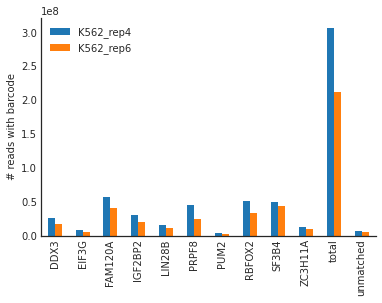

In [13]:

figdir = '/home/hsher/scratch/oligofig/'
plt.rcParams['pdf.fonttype'] = 42
count[['K562_rep4', 'K562_rep6']].dropna().sort_index().plot.bar()
plt.ylabel('# reads with barcode')
sns.despine()
plt.savefig(os.path.join(figdir, 'multiplex-nread.pdf'))

In [14]:
count.to_csv(os.path.join(figdir, 'multiplex-nread.csv'))

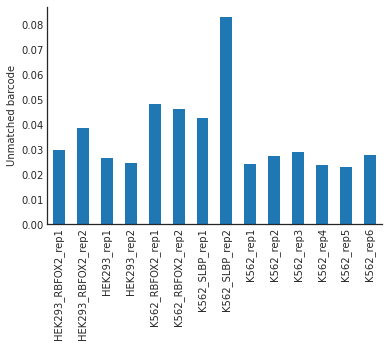

In [15]:
(count.loc['unmatched']/count.loc['total']).plot.bar()
plt.ylabel('Unmatched barcode')
sns.despine()

<AxesSubplot:>

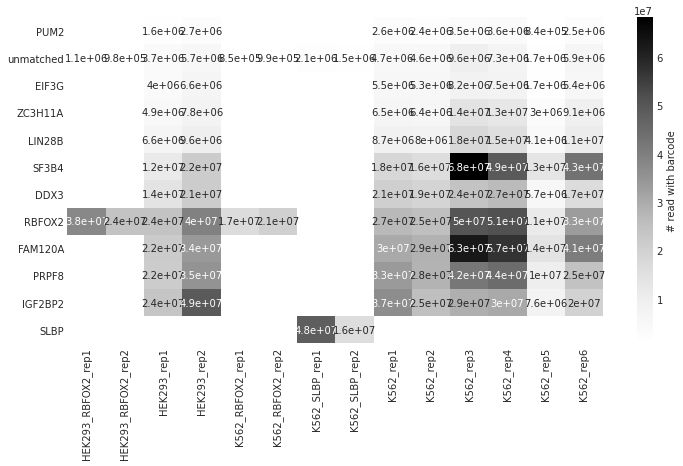

In [16]:

f, ax = plt.subplots(figsize = (12,6))
sns.heatmap(count.loc[count.index!='total', :].sort_values(by = 'K562_rep1'), 
            annot = True, 
            cbar_kws={'label': '# read with barcode'},
           cmap = 'Greys')

## what explains the uneveness for multiplexed libraries
### RNA expression of the RBP?

In [17]:

rna_expression = pd.read_csv('/home/hsher/projects/Metadensity_notebooks/bind_site_finder/CCLE_RNAseq_genes_rpkm_20180929.tsv', sep = '\t', skiprows = 2, index_col = 1)


In [20]:
cell_col = [c for c in rna_expression.columns if 'K562' in c or 'HEK' in c]

<AxesSubplot:ylabel='Description'>

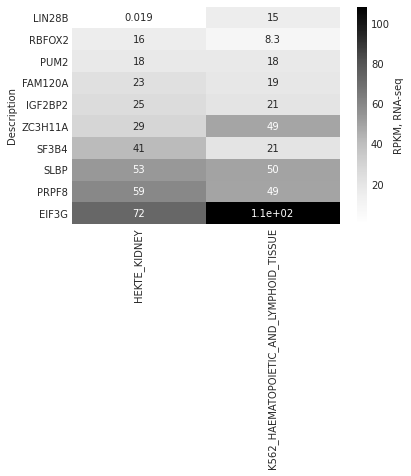

In [22]:
rbp_expression = rna_expression.loc[rna_expression.index.isin(count.index), cell_col]


sns.heatmap(rbp_expression.sort_values(by = cell_col[0]), 
            annot = True, 
            cbar_kws={'label': 'RPKM, RNA-seq'},
           cmap = 'Greys')

### Protein expression

<AxesSubplot:ylabel='gene symbol'>

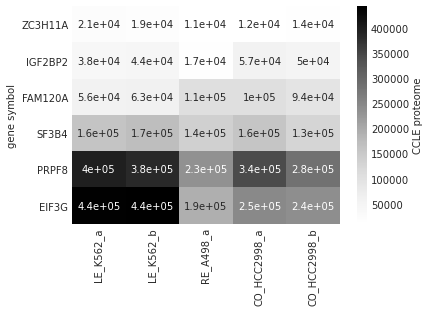

In [24]:
proteome=pd.read_excel('/home/hsher/projects/Metadensity_notebooks/bind_site_finder/1-s2.0-S2589004219304407-mmc2.xlsx',
                      sheet_name = 'D',
                      engine = 'openpyxl')
proteome.set_index('gene symbol', inplace = True)
p_cellcol = ['LE_K562_a', 'LE_K562_b', 'RE_A498_a', 'CO_HCC2998_a', 'CO_HCC2998_b']

subp = proteome.loc[proteome.index.isin(count.index), p_cellcol]

sns.heatmap(subp.sort_values(by = 'LE_K562_a'), 
            annot = True, 
            cbar_kws={'label': 'CCLE proteome'},
           cmap = 'Greys')

# Mapping statistics

In [25]:
ABC_dir1='/home/hsher/scratch/ABC_reprocess/QC'
ABC_dir2='/home/hsher/scratch/ABC_reprocess2/QC'

repeatstat = sorted([os.path.join(ABC_dir1, f, 'repeat_mapping_stats.csv') for f in os.listdir(ABC_dir1)
                  if os.path.isfile(os.path.join(ABC_dir1, f, 'repeat_mapping_stats.csv'))
                  
                  ])+sorted(
    [os.path.join(ABC_dir2, f, 'repeat_mapping_stats.csv') for f in os.listdir(ABC_dir2)
                  if os.path.isfile(os.path.join(ABC_dir2, f, 'repeat_mapping_stats.csv'))
                  
                  ])

In [26]:
allrepdf = []
for file in repeatstat:
    name = os.path.basename(os.path.dirname(file))
    
    df = pd.read_csv(repeatstat[0])
    df['RBP'] = df['STAR Log filename'].str.split('/', expand = True)[3].str.replace('.Log.final.out', '')
    df['uid'] = name + '_'+df['RBP']
    allrepdf.append(df)

In [27]:
allrepdf = pd.concat(allrepdf, axis = 0)

In [28]:
allrepdf.to_csv(os.path.join(figdir, 'multiplex-repmap.csv'))

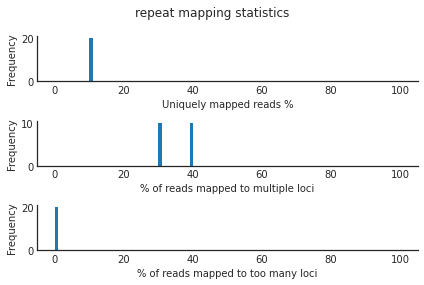

In [29]:
plt.style.use('seaborn-white')
f, ax = plt.subplots(3,1, figsize = (6,4),sharex = False)
allrepdf['Uniquely mapped reads %'].plot.hist(ax = ax[0], range = (0,100), bins = 100)
ax[0].set_xlabel('Uniquely mapped reads %')
allrepdf['% of reads mapped to multiple loci'].plot.hist(ax = ax[1], range = (0,100), bins = 100)
ax[1].set_xlabel('% of reads mapped to multiple loci')
allrepdf['% of reads mapped to too many loci'].plot.hist(ax = ax[2], range = (0,100), bins = 100)
ax[2].set_xlabel('% of reads mapped to too many loci')
sns.despine()
plt.suptitle('repeat mapping statistics')
plt.tight_layout()

In [30]:
ABC_dir1='/home/hsher/scratch/ABC_reprocess/QC'
ABC_dir2='/home/hsher/scratch/ABC_reprocess2/QC'

genomestat = sorted([os.path.join(ABC_dir1, f, 'genome_mapping_stats.csv') for f in os.listdir(ABC_dir1)
                  if os.path.isfile(os.path.join(ABC_dir1, f, 'genome_mapping_stats.csv'))
                  
                  ])+sorted(
    [os.path.join(ABC_dir2, f, 'genome_mapping_stats.csv') for f in os.listdir(ABC_dir2)
                  if os.path.isfile(os.path.join(ABC_dir2, f, 'genome_mapping_stats.csv'))
                  
                  ])

In [31]:
allgenomedf = []
for file in genomestat:
    name = os.path.basename(os.path.dirname(file))
    
    df = pd.read_csv(genomestat[0])
    df['RBP'] = df['STAR Log filename'].str.split('/', expand = True)[3].str.replace('.genome-mapped.Log.final.out', '')
    df['uid'] = name + '_'+df['RBP']
    allgenomedf.append(df)
allgenomedf = pd.concat(allgenomedf, axis = 0)

In [32]:
allgenomedf.to_csv(os.path.join(figdir, 'multiplex-genomemapstat.csv'))

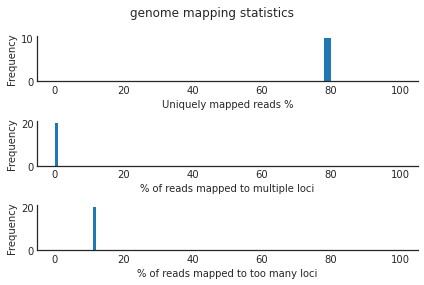

In [33]:
plt.style.use('seaborn-white')
f, ax = plt.subplots(3,1, figsize = (6,4),sharex = False)
allgenomedf['Uniquely mapped reads %'].plot.hist(ax = ax[0], range = (0,100), bins = 100)
ax[0].set_xlabel('Uniquely mapped reads %')
allgenomedf['% of reads mapped to multiple loci'].plot.hist(ax = ax[1], range = (0,100), bins = 100)
ax[1].set_xlabel('% of reads mapped to multiple loci')
allgenomedf['% of reads mapped to too many loci'].plot.hist(ax = ax[2], range = (0,100), bins = 100)
ax[2].set_xlabel('% of reads mapped to too many loci')
sns.despine()
plt.suptitle('genome mapping statistics')
plt.tight_layout()

# Duplicate rate

In [34]:
dan = pd.read_csv('Dan_multiplex1.csv', index_col = 0)
dan1 = pd.read_csv('Dan_singleplex.csv', index_col = 0)

dan = pd.concat([dan, dan1], axis = 0)

In [35]:
dan['undup_bam'] = dan['bam_0'].str.replace('SoSo.rmDupSo.Aligned.out.bam','SoSo.Aligned.out.bam')

In [36]:
import pysam
def get_mapped_read(bamfile):
    try:
        f = pysam.AlignmentFile(bamfile, "rb")
    except:
        return 0
    return f.mapped
dan['before_dedup'] = dan['undup_bam'].apply(get_mapped_read)
dan['after_dedup'] = dan['bam_0'].apply(get_mapped_read)

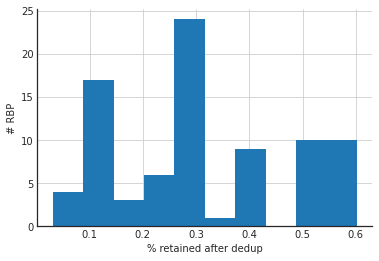

In [37]:

dan['perc_unique']=dan['after_dedup']/dan['before_dedup']
dan['perc_unique'].hist()
plt.xlabel('% retained after dedup')
plt.ylabel('# RBP')
sns.despine()

In [38]:
dan.to_csv(os.path.join(figdir, 'PCR_dup_rate.csv'))

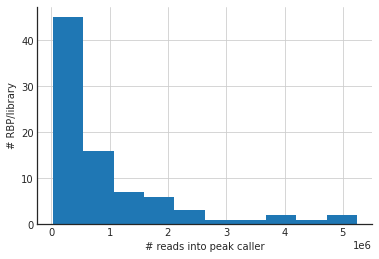

In [39]:
dan['after_dedup'].hist()
plt.ylabel('# RBP/library')
plt.xlabel('# reads into peak caller')
sns.despine()